## CURATION AND PREPROCESSING

1. Load conll2012 ontonotes dataset

In [1]:
from datasets import load_dataset

dataset = load_dataset("conll2012_ontonotesv5",'english_v12')
# dataset = load_dataset("/mnt/sda1/Text_Mining_Group45/final/conll-2012/v12")

/mnt/sda1/envs/m-final/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(len(dataset['train']))
print(len(dataset['train'][0]['sentences']))

10539
235


2. List of unique and indexed labels in dataset

In [3]:
pos_conll_labels = ["XX", "``", "$", "''", "*", ",", "-LRB-", "-RRB-", ".", ":", "ADD", "AFX", "CC", "CD", "DT", "EX", "FW", "HYPH", "IN", "JJ", "JJR", "JJS", "LS", "MD", "NFP", "NN", "NNP", "NNPS", "NNS", "PDT", "POS", "PRP", "PRP$", "RB", "RBR", "RBS", "RP", "SYM", "TO", "UH", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "VERB", "WDT", "WP", "WP$", "WRB"]
nerc_conll_labels=["O", "B-PERSON", "I-PERSON", "B-NORP", "I-NORP", "B-FAC", "I-FAC", "B-ORG", "I-ORG", "B-GPE", "I-GPE", "B-LOC", "I-LOC", "B-PRODUCT", "I-PRODUCT", "B-DATE", "I-DATE", "B-TIME", "I-TIME", "B-PERCENT", "I-PERCENT", "B-MONEY", "I-MONEY", "B-QUANTITY", "I-QUANTITY", "B-ORDINAL", "I-ORDINAL", "B-CARDINAL", "I-CARDINAL", "B-EVENT", "I-EVENT", "B-WORK_OF_ART", "I-WORK_OF_ART", "B-LAW", "I-LAW", "B-LANGUAGE", "I-LANGUAGE"]

In [4]:
print(dataset['train'][0]['sentences'][1])

{'part_id': 0, 'words': ['We', 'respectfully', 'invite', 'you', 'to', 'watch', 'a', 'special', 'edition', 'of', 'Across', 'China', '.'], 'pos_tags': [31, 33, 40, 31, 38, 40, 14, 19, 25, 18, 26, 26, 8], 'parse_tree': '(TOP(S(NP (PRP We) )(ADVP (RB respectfully) )(VP (VB invite) (NP (PRP you) )(S(VP (TO to) (VP (VB watch) (NP(NP (DT a)  (JJ special)  (NN edition) )(PP (IN of) (NP (NNP Across)  (NNP China) ))))))) (. .) ))', 'predicate_lemmas': [None, None, 'invite', None, None, 'watch', None, None, None, None, None, None, None], 'predicate_framenet_ids': [None, None, '01', None, None, '01', None, None, None, None, None, None, None], 'word_senses': [None, None, 3.0, None, None, 1.0, None, None, None, None, None, None, None], 'speaker': 'Speaker#1', 'named_entities': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0], 'srl_frames': [{'verb': 'invite', 'frames': ['B-ARG0', 'B-ARGM-MNR', 'B-V', 'B-ARG1', 'B-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'O']}, {'verb': 'wa

3. Make needed nerc values into dataframe (apart from O as this is in abundance. )

In [5]:
import pandas as pd

needed_nerc = ["B-PERSON", "I-PERSON", "B-ORG", "I-ORG", "B-WORK_OF_ART", "I-WORK_OF_ART", "B-DATE", "I-DATE"]
data = {'Sentence #': [], 'Word': [], 'POS': [], 'NERC Tag': []}
sentence_n = 0

for x in range(0,10539):
    doc = dataset['train'][x]
    for sentence in doc['sentences']:
        sentence_tags = [nerc_conll_labels[nerc_index] for nerc_index in sentence['named_entities']]
        if any(tag in needed_nerc for tag in sentence_tags):
            for i, word in enumerate(sentence['words']):
                pos_index = sentence['pos_tags'][i]
                nerc_index = sentence['named_entities'][i]
                pos = pos_conll_labels[pos_index]
                nerc = nerc_conll_labels[nerc_index]
                
                data['Sentence #'].append(sentence_n)
                data['Word'].append(word)
                data['POS'].append(pos)
                data['NERC Tag'].append(nerc)
            sentence_n += 1

df = pd.DataFrame(data)



In [6]:
df.head(15)

,Sentence #,Word,POS,NERC Tag
0,0,We,PRP,O
1,0,respectfully,RB,O
2,0,invite,VB,O
3,0,you,PRP,O
4,0,to,TO,O
5,0,watch,VB,O
6,0,a,DT,O
7,0,special,JJ,O
8,0,edition,NN,O
9,0,of,IN,O


4. analyze proportion

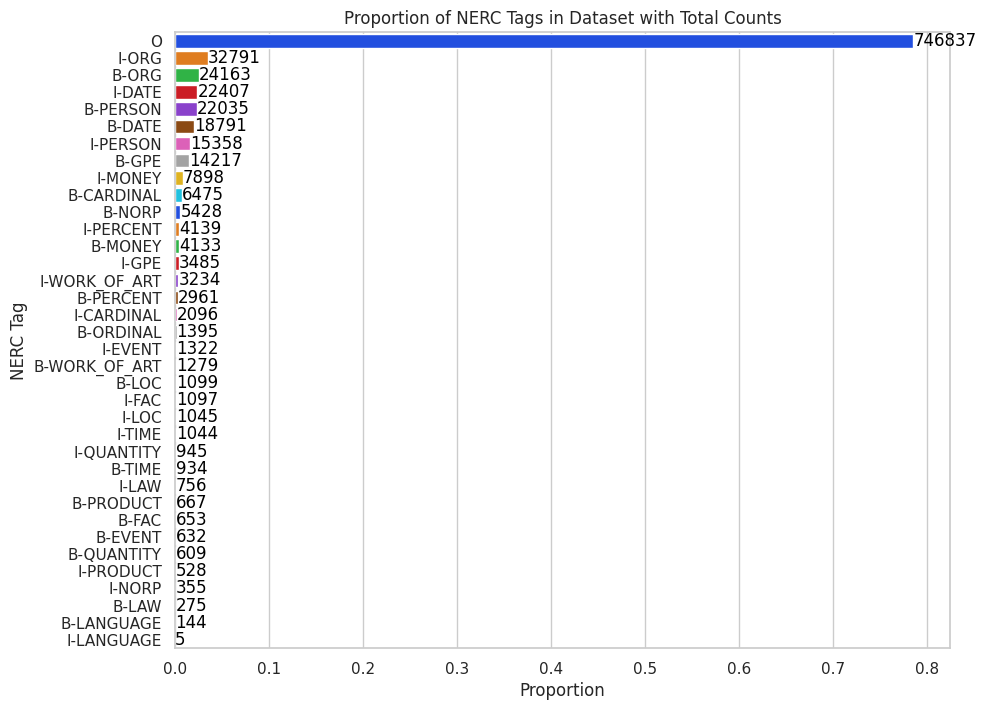

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


tag_counts = df['NERC Tag'].value_counts()

tag_proportions = df['NERC Tag'].value_counts(normalize=True)

tag_counts_df = pd.DataFrame({
    'Label': tag_counts.index,   
    'Count': tag_counts.values,  
    'Proportion': tag_proportions.values  
})


tag_counts_df.head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x="Proportion", y="Label", data=tag_counts_df, palette="bright")


for index, row in tag_counts_df.iterrows():
    annotation_text = f"{row['Count']}"
    barplot.text(row['Proportion'], index, annotation_text, color='black', va='center')

plt.title('Proportion of NERC Tags in Dataset with Total Counts')
plt.xlabel('Proportion')
plt.ylabel('NERC Tag')

plt.savefig('/mnt/sda1/Text_Mining_Group45/final/original-proportion.png')
plt.show()


Get rid of any unnecessary labels unless they include work of art

/tmp/ipykernel_13499/2608606733.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentence #'] = filtered_df['Sentence #'].map(sentence_mapping)


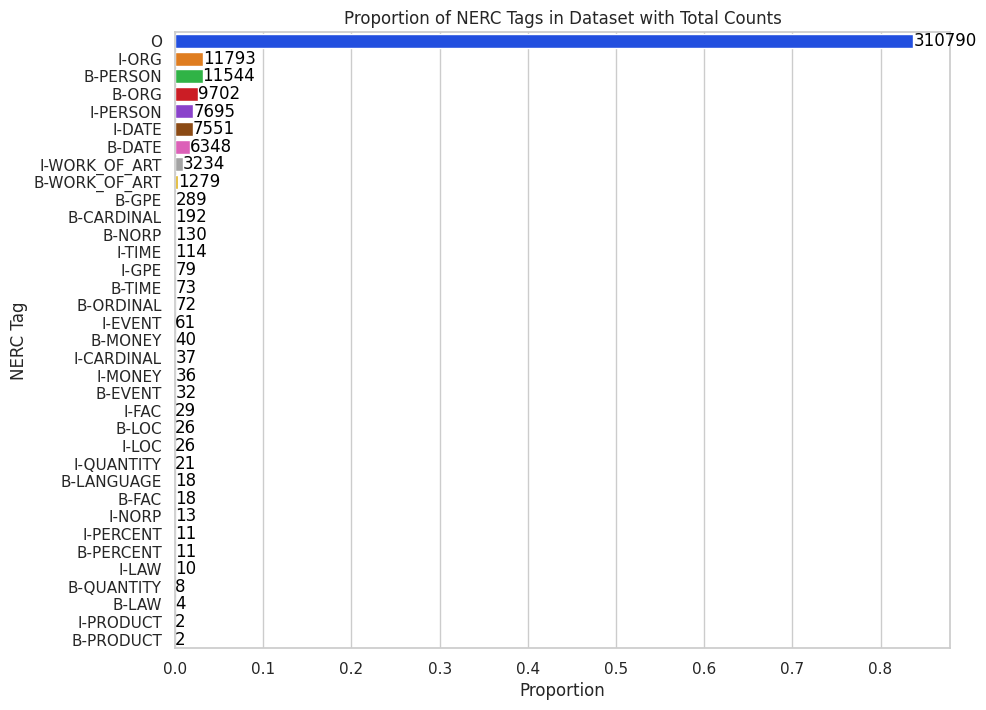

In [8]:
unnecessary = ['B-LANGUAGE', 'I-LANGUAGE', 'B-LAW', 'I-NORP', 'I-PRODUCT', 'B-QUANTITY', 'B-EVENT', 'B-FAC', 'B-PRODUCT', 'I-LAW', 'B-TIME', 'I-QUANTITY', 'I-TIME', 'I-LOC', 'I-FAC', 'B-LOC', 'I-EVENT', 'B-ORDINAL', 'I-CARDINAL', 'B-PERCENT','I-GPE', 'B-MONEY', 'I-PERCENT', 'B-NORP', 'B-CARDINAL', 'I-MONEY', 'B-GPE']


to_keep = set()
for sentence_number, group in df.groupby('Sentence #'):
    tags = set(group['NERC Tag'])
    # Check if sentence contains any unnecessary tags and if it also contains art tags
    if not tags.isdisjoint(unnecessary) and ('B-WORK_OF_ART' in tags or 'I-WORK_OF_ART' in tags):
        to_keep.add(sentence_number)
    elif tags.isdisjoint(unnecessary):
        to_keep.add(sentence_number)


filtered_df = df[df['Sentence #'].isin(to_keep)]


sentence_mapping = {old_num: new_num for new_num, old_num in enumerate(sorted(to_keep), 1)}
filtered_df['Sentence #'] = filtered_df['Sentence #'].map(sentence_mapping)


filtered_df.reset_index(drop=True, inplace=True)


tag_counts = filtered_df['NERC Tag'].value_counts()

tag_proportions = filtered_df['NERC Tag'].value_counts(normalize=True)

tag_counts_df = pd.DataFrame({
    'Label': tag_counts.index,   
    'Count': tag_counts.values,  
    'Proportion': tag_proportions.values  
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x="Proportion", y="Label", data=tag_counts_df, palette="bright")


for index, row in tag_counts_df.iterrows():
    annotation_text = f"{row['Count']}"
    barplot.text(row['Proportion'], index, annotation_text, color='black', va='center')

plt.title('Proportion of NERC Tags in Dataset with Total Counts')
plt.xlabel('Proportion')
plt.ylabel('NERC Tag')

plt.savefig('/mnt/sda1/Text_Mining_Group45/final/preprocessed1-proportion.png')
plt.show()

5. Get rid of all unnecessary labels

/tmp/ipykernel_13499/3858911901.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Sentence #'] = filtered_df2['Sentence #'].map(sentence_mapping)


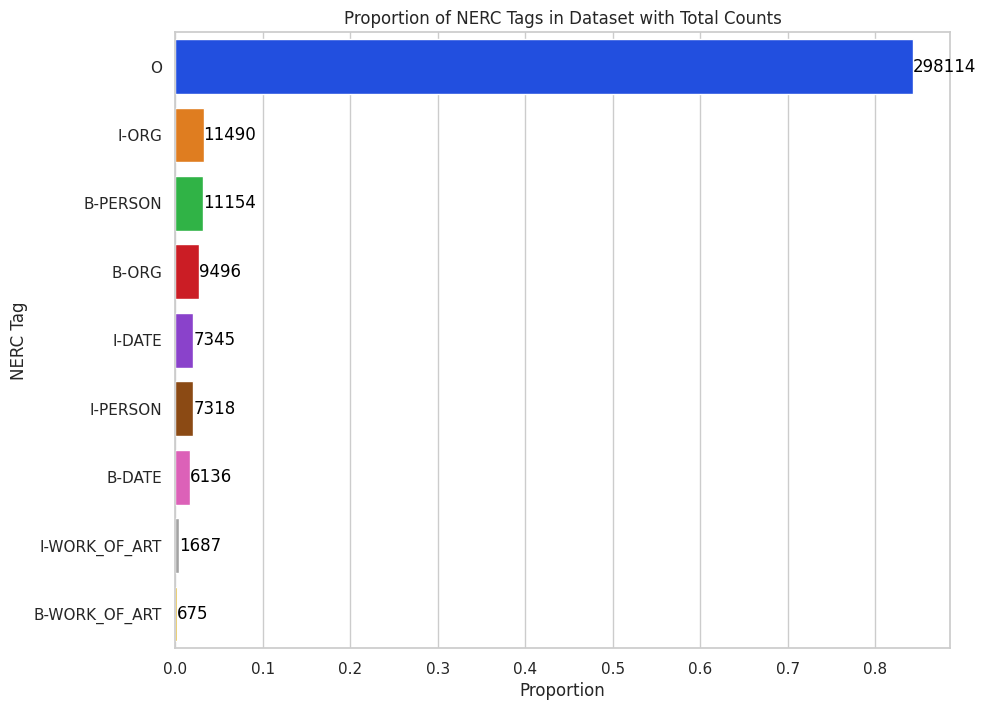

In [9]:
import pandas as pd

unnecessary = ['B-LANGUAGE', 'I-LANGUAGE', 'B-LAW', 'I-NORP', 'I-PRODUCT', 'B-QUANTITY', 'B-EVENT', 'B-FAC', 'B-PRODUCT', 'I-LAW', 'B-TIME', 'I-QUANTITY', 'I-TIME', 'I-LOC', 'I-FAC', 'B-LOC', 'I-EVENT', 'B-ORDINAL', 'I-CARDINAL', 'B-PERCENT','I-GPE', 'B-MONEY', 'I-PERCENT', 'B-NORP', 'B-CARDINAL', 'I-MONEY', 'B-GPE']


to_delete = set()
for sentence_number, group in df.groupby('Sentence #'):
    tags = set(group['NERC Tag'])
    if not tags.isdisjoint(unnecessary):
        to_delete.add(sentence_number)

filtered_df2 = df[~df['Sentence #'].isin(to_delete)]

unique_sentence_numbers = sorted(filtered_df2['Sentence #'].unique())
sentence_mapping = {old_num: new_num for new_num, old_num in enumerate(unique_sentence_numbers, 1)}
filtered_df2['Sentence #'] = filtered_df2['Sentence #'].map(sentence_mapping)


filtered_df2.reset_index(drop=True, inplace=True)

tag_counts = filtered_df2['NERC Tag'].value_counts()

tag_proportions = filtered_df2['NERC Tag'].value_counts(normalize=True)

tag_counts_df = pd.DataFrame({
    'Label': tag_counts.index,   
    'Count': tag_counts.values,  
    'Proportion': tag_proportions.values  
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x="Proportion", y="Label", data=tag_counts_df, palette="bright")


for index, row in tag_counts_df.iterrows():
    annotation_text = f"{row['Count']}"
    barplot.text(row['Proportion'], index, annotation_text, color='black', va='center')

plt.title('Proportion of NERC Tags in Dataset with Total Counts')
plt.xlabel('Proportion')
plt.ylabel('NERC Tag')


plt.savefig('/mnt/sda1/Text_Mining_Group45/final/preprocessed2-proportion.png')
plt.show()


6. load test set, change i/b-per to person, and check proportionality.

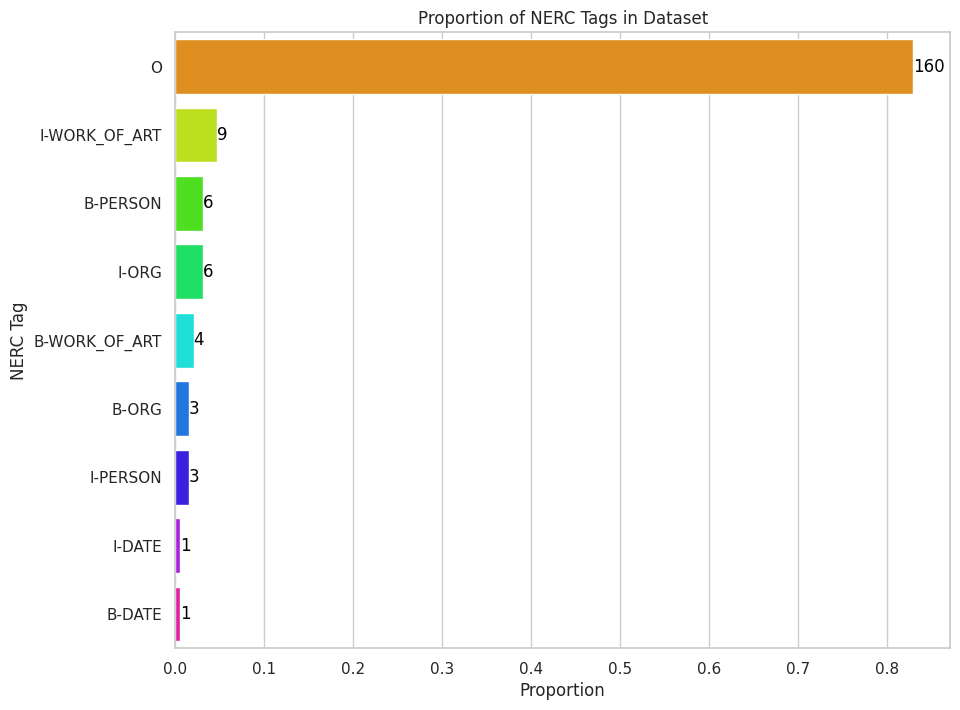

In [10]:
file_path = '/mnt/sda1/Text_Mining_Group45/final/NER-test.tsv'
test_df = pd.read_csv(file_path, sep='\t', header=0)
test_df['BIO NER tag'] = test_df['BIO NER tag'].replace({'B-PER': 'B-PERSON', 'I-PER': 'I-PERSON'})
test_df.columns = ['Sentence ID', 'Token ID', 'Word', 'NERC Tag']

tag_counts = test_df['NERC Tag'].value_counts()
proportions = (tag_counts / tag_counts.sum()).reset_index()
proportions.columns = ['NERC Tag', 'Proportion']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
palette = sns.color_palette("hsv", len(proportions))
barplot = sns.barplot(x="Proportion", y="NERC Tag", data=proportions, palette=palette)

for index, row in proportions.iterrows():
    barplot.text(row['Proportion'], index, f"{tag_counts[row['NERC Tag']]:.0f}", color='black', va='center')

plt.title('Proportion of NERC Tags in Dataset')
plt.xlabel('Proportion')
plt.ylabel('NERC Tag')


plt.savefig('/mnt/sda1/Text_Mining_Group45/final/test-proportion.png')
plt.show()


## TRAINING (nerc-crf lab4a.2)

In [11]:
train_df = filtered_df2
train_df.tail()

,Sentence #,Word,POS,NERC Tag
353410,16545,foreign,NN,O
353411,16545,-,HYPH,O
353412,16545,funded,VBN,O
353413,16545,bank,NN,O
353414,16545,.,.,O


In [12]:
words = list(set(train_df["Word"].values))
n_words = len(words)
pos = list(set(train_df["POS"].values))
labels = list(set(train_df["NERC Tag"].values))

# class SentenceGetter(object):
    
#     def __init__(self, data):
#         self.n_sent = 1
#         self.data = data
#         self.empty = False
#         agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
#                                                            s["POS"].values.tolist(),
#                                                            s["NERC Tag"].values.tolist())]
#         self.grouped = self.data.groupby("Sentence #").apply(agg_func)
#         self.sentences = [s for s in self.grouped]
    
#     def get_next(self):
#         try:
#             s = self.grouped["Sentence: {}".format(self.n_sent)]
#             self.n_sent += 1
#             return s
#         except:
#             return None

class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        
        # Check if the 'POS' column exists in the DataFrame
        if 'POS' in data.columns:
            agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                               s["POS"].values.tolist(),
                                                               s["NERC Tag"].values.tolist())]
        else:
            agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                         s["NERC Tag"].values.tolist())]
        
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.sentences[self.n_sent - 1]  # Adjusted to access sentences by index
            self.n_sent += 1
            return s
        except IndexError:  # Catching IndexError instead
            return None


In [13]:
getter = SentenceGetter(train_df)
sentences = getter.sentences
print(len(sentences))
sentence= sentences[0]
print(sentence)

16545
[('We', 'PRP', 'O'), ('respectfully', 'RB', 'O'), ('invite', 'VB', 'O'), ('you', 'PRP', 'O'), ('to', 'TO', 'O'), ('watch', 'VB', 'O'), ('a', 'DT', 'O'), ('special', 'JJ', 'O'), ('edition', 'NN', 'O'), ('of', 'IN', 'O'), ('Across', 'NNP', 'B-ORG'), ('China', 'NNP', 'I-ORG'), ('.', '.', 'O')]


Edited verion of lab to allow for no postag in test set

In [14]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1] if len(sent[i]) > 1 else None  # Check if POS tag is available
    
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    
    if postag:
        features.update({
            'postag': postag,
            'postag[:2]': postag[:2],
        })
    
    if i > 0:
        word1 = sent[i-1][0]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
        })
        if len(sent[i-1]) > 1:  # Check if previous token has a POS tag
            postag1 = sent[i-1][1]
            features.update({
                '-1:postag': postag1,
                '-1:postag[:2]': postag1[:2],
            })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
        })
        if len(sent[i+1]) > 1:  # Check if next token has a POS tag
            postag1 = sent[i+1][1]
            features.update({
                '+1:postag': postag1,
                '+1:postag[:2]': postag1[:2],
            })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    
    if len(sent[0]) == 3: 
        return [label for token, postag, label in sent]
    elif len(sent[0]) == 2: 
        return [label for token, label in sent]


def sent2tokens(sent):
    return [token for token, postag, label in sent]


In [15]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [16]:
print(X[0])

[{'bias': 1.0, 'word.lower()': 'we', 'word[-3:]': 'We', 'word[-2:]': 'We', 'word.isupper()': False, 'word.istitle()': True, 'word.isdigit()': False, 'postag': 'PRP', 'postag[:2]': 'PR', 'BOS': True, '+1:word.lower()': 'respectfully', '+1:word.istitle()': False, '+1:word.isupper()': False, '+1:postag': 'RB', '+1:postag[:2]': 'RB'}, {'bias': 1.0, 'word.lower()': 'respectfully', 'word[-3:]': 'lly', 'word[-2:]': 'ly', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'postag': 'RB', 'postag[:2]': 'RB', '-1:word.lower()': 'we', '-1:word.istitle()': True, '-1:word.isupper()': False, '-1:postag': 'PRP', '-1:postag[:2]': 'PR', '+1:word.lower()': 'invite', '+1:word.istitle()': False, '+1:word.isupper()': False, '+1:postag': 'VB', '+1:postag[:2]': 'VB'}, {'bias': 1.0, 'word.lower()': 'invite', 'word[-3:]': 'ite', 'word[-2:]': 'te', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'postag': 'VB', 'postag[:2]': 'VB', '-1:word.lower()': 'respectful

In [17]:
import sklearn_crfsuite
from sklearn_crfsuite import CRF
# different parameters are used for training
# check https://sklearn-crfsuite.readthedocs.io/en/latest/api.html?highlight=CRF
crf = CRF(algorithm='lbfgs',
          c1=0.1, #The coefficient for L1 regularization.
          c2=0.1, #The coefficient for L2 regularization.
          max_iterations=100,
          all_possible_transitions=False) #When True, CRFsuite generates transition features that associate all of possible label pairs, 
                                        #including ones that never occur. Suppose that the number of labels in the training data is L, this function will generate (L * L) transition features


In [18]:
crf.fit(X,y)

/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

## Test set ready and testing

In [19]:
test_df.head()

,Sentence ID,Token ID,Word,NERC Tag
0,0,0,I,O
1,0,1,would,O
2,0,2,n't,O
3,0,3,be,O
4,0,4,caught,O


In [20]:

test_df.drop(columns=['Token ID'], inplace=True)

test_df.rename(columns={'Sentence ID': 'Sentence #'}, inplace=True)
test_df.head()

,Sentence #,Word,NERC Tag
0,0,I,O
1,0,would,O
2,0,n't,O
3,0,be,O
4,0,caught,O


In [21]:
getter_test = SentenceGetter(test_df)
sentences_test = getter_test.sentences
print(len(sentences_test))
sentence= sentences_test[0]
print(sentence)

10
[('I', 'O'), ('would', 'O'), ("n't", 'O'), ('be', 'O'), ('caught', 'O'), ('dead', 'O'), ('watching', 'O'), ('the', 'O'), ('NFL', 'B-ORG'), ('if', 'O'), ('it', 'O'), ('were', 'O'), ("n't", 'O'), ('for', 'O'), ('Taylor', 'B-PERSON'), ('Swift', 'I-PERSON'), ('.', 'O')]


In [22]:
X_test = [sent2features(s) for s in sentences_test]
y_test = [sent2labels(s) for s in sentences_test]

Test

In [23]:
y_pred=crf.predict(X_test)

In [24]:
from sklearn_crfsuite import metrics
report=sklearn_crfsuite.metrics.flat_classification_report(y_test, y_pred)
print(report)

               precision    recall  f1-score   support

       B-DATE       1.00      1.00      1.00         1
        B-ORG       0.00      0.00      0.00         3
     B-PERSON       0.00      0.00      0.00         6
B-WORK_OF_ART       0.25      0.25      0.25         4
       I-DATE       0.25      1.00      0.40         1
        I-ORG       0.00      0.00      0.00         6
     I-PERSON       0.00      0.00      0.00         3
I-WORK_OF_ART       0.19      0.67      0.30         9
            O       0.90      0.86      0.88       160

     accuracy                           0.76       193
    macro avg       0.29      0.42      0.31       193
 weighted avg       0.77      0.76      0.76       193



/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


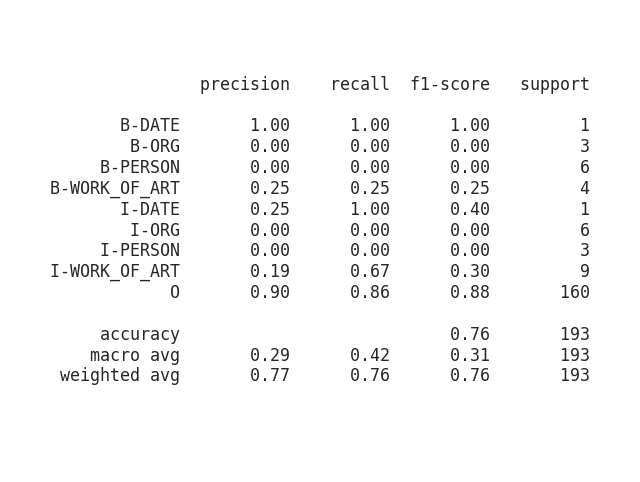

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# Add the text to the figure
ax.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

# Save the figure
plt.savefig('/mnt/sda1/Text_Mining_Group45/final/classification_report1.png', dpi=200, bbox_inches='tight')


Save crf

In [26]:
from joblib import dump

# Assuming `crf` is your trained CRF model
dump(crf, '/mnt/sda1/Text_Mining_Group45/final/crf_model_1.pkl')


['/mnt/sda1/Text_Mining_Group45/final/crf_model_1.pkl']

Inspect

In [27]:
# import eli5
# eli5.show_weights(crf, top=30)
#alternative script

Finetune

In [28]:
crf2 = CRF(algorithm='lbfgs',
          c1=10, #L1 regularization is now set to 100
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False)

In [29]:
crf2.fit(X, y)

/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=False, c1=10, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

In [30]:
y_pred2=crf2.predict(X_test)

In [31]:
report=sklearn_crfsuite.metrics.flat_classification_report(y_test, y_pred2)
print(report)

               precision    recall  f1-score   support

       B-DATE       1.00      1.00      1.00         1
        B-ORG       0.00      0.00      0.00         3
     B-PERSON       0.00      0.00      0.00         6
B-WORK_OF_ART       0.00      0.00      0.00         4
       I-DATE       0.20      1.00      0.33         1
        I-ORG       0.00      0.00      0.00         6
     I-PERSON       0.00      0.00      0.00         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.89      0.94      0.92       160

     accuracy                           0.79       193
    macro avg       0.23      0.33      0.25       193
 weighted avg       0.74      0.79      0.77       193



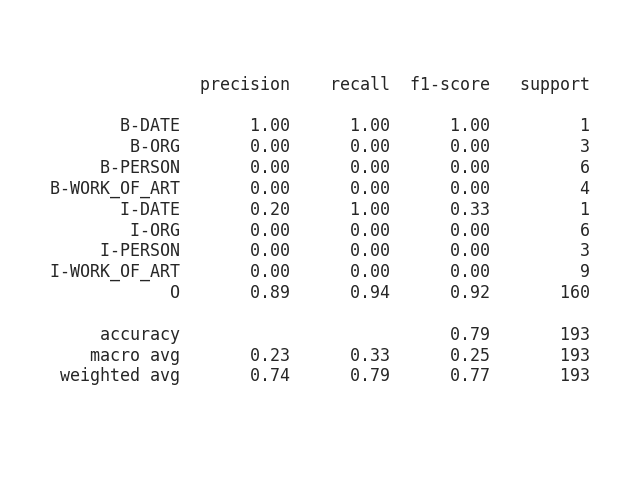

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# Add the text to the figure
ax.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

# Save the figure
plt.savefig('/mnt/sda1/Text_Mining_Group45/final/classification_report2.png', dpi=200, bbox_inches='tight')


In [33]:
dump(crf2, '/mnt/sda1/Text_Mining_Group45/final/crf_model_2.pkl')

['/mnt/sda1/Text_Mining_Group45/final/crf_model_2.pkl']

In [34]:
crf3 = CRF(algorithm='lbfgs',
          c1=10,
          c2=5,
          max_iterations=100,
          all_possible_transitions=False)

crf3.fit(X, y)
y_pred3=crf3.predict(X_test)

report=sklearn_crfsuite.metrics.flat_classification_report(y_test, y_pred3)
dump(crf3, '/mnt/sda1/Text_Mining_Group45/final/crf_model_3.pkl')
print(report)

               precision    recall  f1-score   support

       B-DATE       1.00      1.00      1.00         1
        B-ORG       0.00      0.00      0.00         3
     B-PERSON       0.00      0.00      0.00         6
B-WORK_OF_ART       0.00      0.00      0.00         4
       I-DATE       0.20      1.00      0.33         1
        I-ORG       0.00      0.00      0.00         6
     I-PERSON       0.00      0.00      0.00         3
I-WORK_OF_ART       0.44      0.44      0.44         9
            O       0.86      0.96      0.91       160

     accuracy                           0.82       193
    macro avg       0.28      0.38      0.30       193
 weighted avg       0.74      0.82      0.78       193



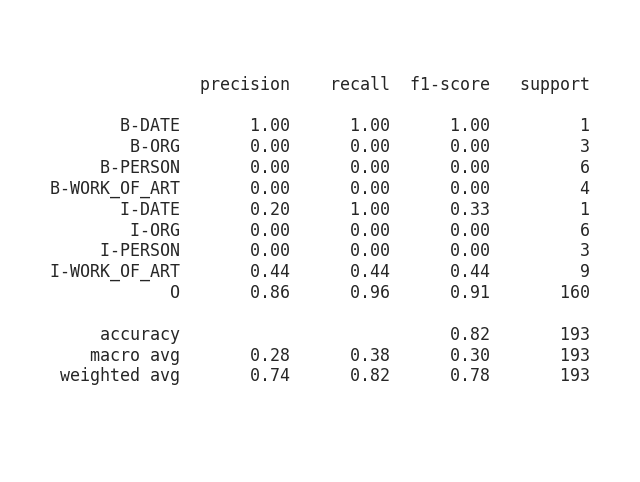

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# Add the text to the figure
ax.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

# Save the figure
plt.savefig('/mnt/sda1/Text_Mining_Group45/final/classification_report3.png', dpi=200, bbox_inches='tight')


Add own POS tags to test set

In [80]:
import pandas as pd

def load_and_save_csv(input_csv_path, output_csv_path=None):

    df = pd.read_csv(input_csv_path)

    if output_csv_path is not None:
        df.to_csv(output_csv_path, index=False)
        print(f"DataFrame saved to {output_csv_path}")

    return df

input_csv_path = '/mnt/sda1/Text_Mining_Group45/final/processed_ner_data_with_corrected_pos_tags.csv'
output_csv_path = None  

test_pos_df = load_and_save_csv(input_csv_path, output_csv_path)

print(test_pos_df.head())


   Sentence #    Word NERC Tag  POS
0           0       I        O  PRP
1           1   would        O  VBP
2           2     n't        O   RB
3           3      be        O   VB
4           4  caught        O  VBN


In [81]:
test_pos_df['IsNewSentence'] = test_pos_df['Sentence #'].eq(0)

# Step 2: Cumulatively sum these markers to get a new sentence number.
test_pos_df['Adjusted Sentence #'] = test_pos_df['IsNewSentence'].cumsum()

# Optionally, drop the 'IsNewSentence' column as it's no longer needed.
test_pos_df.drop(columns=['IsNewSentence'], inplace=True)

test_pos_df['Sentence #'] = test_pos_df['Adjusted Sentence #']

test_pos_df.drop(columns=['Adjusted Sentence #'], inplace=True)
test_pos_df['NERC Tag'] = test_pos_df['NERC Tag'].replace({'B-PER': 'B-PERSON', 'I-PER': 'I-PERSON'})

# Show the result
print(test_pos_df.head(10))

   Sentence #      Word NERC Tag  POS
0           1         I        O  PRP
1           1     would        O  VBP
2           1       n't        O   RB
3           1        be        O   VB
4           1    caught        O  VBN
5           1      dead        O   JJ
6           1  watching        O  PRP
7           1       the        O   DT
8           1       NFL    B-ORG  NNP
9           1        if        O  PRP


In [82]:
getter_test_pos = SentenceGetter(test_pos_df)
sentences_test_pos = getter_test_pos.sentences
print(len(sentences_test_pos))
sentence= sentences_test_pos[0]
print(sentence)

X_test_pos = [sent2features(s) for s in sentences_test_pos]
y_test_pos = [sent2labels(s) for s in sentences_test_pos]

10
[('I', 'PRP', 'O'), ('would', 'VBP', 'O'), ("n't", 'RB', 'O'), ('be', 'VB', 'O'), ('caught', 'VBN', 'O'), ('dead', 'JJ', 'O'), ('watching', 'PRP', 'O'), ('the', 'DT', 'O'), ('NFL', 'NNP', 'B-ORG'), ('if', 'PRP', 'O'), ('it', 'MD', 'O'), ('were', 'VBD', 'O'), ("n't", 'VB', 'O'), ('for', 'IN', 'O'), ('Taylor', 'NNP', 'B-PERSON'), ('Swift', 'NN', 'I-PERSON'), ('.', 'VBD', 'O')]


In [46]:
crf4 = CRF(algorithm='lbfgs',
          c1=0.1, #The coefficient for L1 regularization.
          c2=0.1, #The coefficient for L2 regularization.
          max_iterations=100,
          all_possible_transitions=False) #When True, CRFsuite generates transition features that associate all of possible label pairs, 
                                        #including ones that never occur. Suppose that the number of labels in the training data is L, this function will generate (L * L) transition features


In [47]:
crf4.fit(X,y)
y_pred4=crf4.predict(X_test_pos)

In [48]:
report=sklearn_crfsuite.metrics.flat_classification_report(y_test_pos, y_pred4)
dump(crf4, '/mnt/sda1/Text_Mining_Group45/final/crf_model_4.pkl')
print(report)

               precision    recall  f1-score   support

       B-DATE       1.00      1.00      1.00         1
        B-ORG       0.33      0.33      0.33         3
     B-PERSON       0.40      0.33      0.36         6
B-WORK_OF_ART       0.00      0.00      0.00         4
       I-DATE       0.25      1.00      0.40         1
        I-ORG       0.00      0.00      0.00         6
     I-PERSON       0.00      0.00      0.00         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.88      0.93      0.90       160

     accuracy                           0.79       193
    macro avg       0.32      0.40      0.33       193
 weighted avg       0.75      0.79      0.77       193



/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


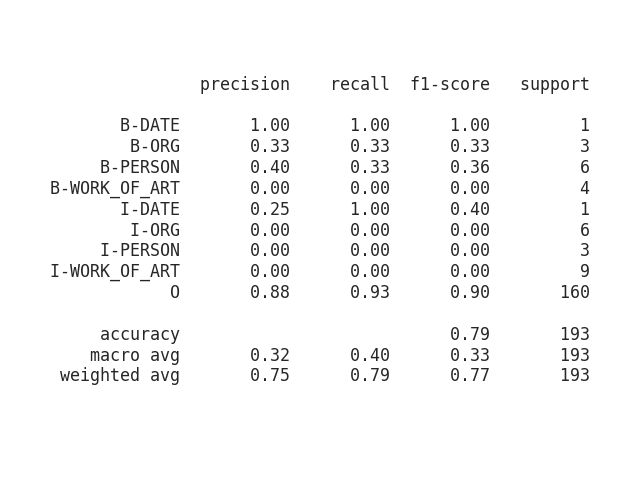

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

ax.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

plt.savefig('/mnt/sda1/Text_Mining_Group45/final/classification_report4.png', dpi=200, bbox_inches='tight')


## Transformers

In [83]:
from simpletransformers.ner import NERModel
sentences = test_pos_df.groupby('Sentence #')['Word'].apply(list).apply(lambda x: ' '.join(x)).tolist()

englishmodel = NERModel(
    model_type="bert",
    model_name="dslim/bert-base-NER",
    use_cuda=True
)

predictions, raw_outputs = englishmodel.predict(sentences)

# for sentence_predictions in predictions:
#     for word, tag in sentence_predictions.items():
#         if tag == 'B-PER':
#             sentence_predictions[word] = 'B-PERSON'
#         elif tag == 'I-PER':
#             sentence_predictions[word] = 'I-PERSON'

print(predictions)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Running Prediction: 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

[[{'I': 'O'}, {'would': 'O'}, {"n't": 'O'}, {'be': 'O'}, {'caught': 'O'}, {'dead': 'O'}, {'watching': 'O'}, {'the': 'O'}, {'NFL': 'B-ORG'}, {'if': 'O'}, {'it': 'O'}, {'were': 'O'}, {"n't": 'O'}, {'for': 'O'}, {'Taylor': 'B-PER'}, {'Swift': 'I-PER'}, {'.': 'O'}], [{'Chris': 'B-PER'}, {"O'Donnell": 'I-PER'}, {'stated': 'O'}, {'that': 'O'}, {'while': 'O'}, {'filming': 'O'}, {'for': 'O'}, {'this': 'O'}, {'movie': 'O'}, {',': 'O'}, {'he': 'O'}, {'felt': 'O'}, {'like': 'O'}, {'he': 'O'}, {'was': 'O'}, {'in': 'O'}, {'a': 'O'}, {'Toys': 'B-MISC'}, {"''": 'I-MISC'}, {'R': 'I-MISC'}, {"''": 'I-MISC'}, {'Us': 'I-MISC'}, {'commercial': 'O'}, {'.': 'O'}], [{'The': 'O'}, {'whole': 'O'}, {'game': 'O'}, {'was': 'O'}, {'a': 'O'}, {'rollercoaster': 'O'}, {'ride': 'O'}, {',': 'O'}, {'but': 'O'}, {'Los': 'B-ORG'}, {'Angeles': 'I-ORG'}, {'Lakers': 'I-ORG'}, {'ultimately': 'O'}, {'persevered': 'O'}, {'and': 'O'}, {'won': 'O'}, {'!': 'O'}], [{'Zendaya': 'B-PER'}, {'slayed': 'O'}, {'in': 'O'}, {'Dune': 'B-MIS

In [84]:
predictions_tags = [[list(mapping.values())[0] for mapping in sentence] for sentence in predictions]

for sentence in predictions_tags:
    for index, tag in enumerate(sentence):
        if tag == 'B-PER':
            sentence[index] = 'B-PERSON'
        if tag == 'I-PER':
            sentence[index] = 'I-PERSON'


print(predictions_tags)


[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'I-PERSON', 'O'], ['B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O'], ['B-PERSON', 'O', 'O', 'B-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O', 'B-PERSON', 'I-PERSON', 'O', 'O'

In [85]:
# report=sklearn_crfsuite.metrics.flat_classification_report(y_test_pos, predictions_tags)
# print(report)
print((y_test_pos))

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'I-PERSON', 'O'], ['B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O'], ['B-PERSON', 'O', 'O', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'I-WORK_OF_ART', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATE', 'I-DATE', 'O', 'O', 'O', 'O'], ['O', 'O', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'I-WORK_OF_AR

In [86]:
print(len(predictions_tags[0]))
print(len(y_test_pos[0]))

17
17


In [89]:
report=sklearn_crfsuite.metrics.flat_classification_report(y_test_pos, predictions_tags)
print(report)


               precision    recall  f1-score   support

       B-DATE       0.00      0.00      0.00         1
       B-MISC       0.00      0.00      0.00         0
        B-ORG       1.00      0.67      0.80         3
     B-PERSON       1.00      1.00      1.00         6
B-WORK_OF_ART       0.00      0.00      0.00         4
       I-DATE       0.00      0.00      0.00         1
       I-MISC       0.00      0.00      0.00         0
        I-ORG       1.00      0.33      0.50         6
     I-PERSON       1.00      1.00      1.00         3
I-WORK_OF_ART       0.00      0.00      0.00         9
            O       0.97      1.00      0.98       160

     accuracy                           0.90       193
    macro avg       0.45      0.36      0.39       193
 weighted avg       0.90      0.90      0.89       193



/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/sda1/envs/m-final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


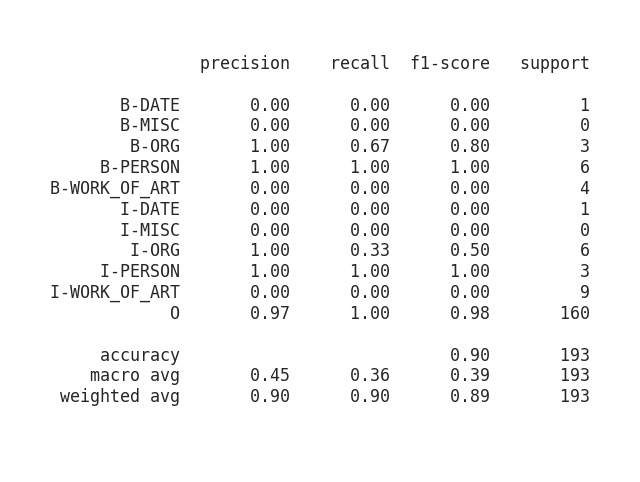

In [90]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

ax.text(0.5, 0.5, report, horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

plt.savefig('/mnt/sda1/Text_Mining_Group45/final/classification_report5.png', dpi=200, bbox_inches='tight')